# Data Science and Business Analytics Intern 

# Author : Himani Sharma

In [95]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Data Loading

In [2]:
iris_dataset=pd.read_csv("Iris.csv")
# Printing the shape and length of dataset
print ("Dataset Length: ", len(iris_dataset)) 
print ("Dataset Shape: ", iris_dataset.shape) 
      
# Printing the first 5 rows of dataset  
print ("Dataset: \n",iris_dataset.head()) 
    
#check for null values 
isnull=iris_dataset.isnull().values.any()
print("\nIf there is any missing value, print True else False: ",isnull)
    
#There are no missing values in dataset. 

Dataset Length:  150
Dataset Shape:  (150, 6)
Dataset: 
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

If there is any missing value, print True else False:  False


# Splitting Dataset into training and  test sets

In [96]:
 #Subject variable
X = iris_dataset.values[:, 1:5] 

#Target/Label variable
Y = iris_dataset.values[:, 5] 

print("Subject variables values: are below:\n",X)

Subject variables values: are below:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.

In [5]:
#Splitting Training and Test sets

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100) 

# Function to predict test data through model

In [24]:
def prediction(X_test, dtree_object): 
  
    # Predicton on test with giniIndex 
    y_pred = dtree_object.predict(X_test) 
    print("Predicted values:\n",y_pred) 
    return y_pred 

# Function to calculate accuracy of model

In [44]:
def accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: \n", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : \n", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : \n", 
    classification_report(y_test, y_pred)) 

# K-Cross Validation

The training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). 
The following procedure is followed for each of the k “folds”:
    
1.A model is trained using  of the folds as training data;

2.The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance 
  measure such as accuracy).

3.The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This 
  approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary   validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

# Function for K-Cross Validation

In [83]:
def cross_val(model,X_train,y_train):
    scores = cross_val_score(model, X_train, y_train,n_jobs=1, cv=10)
    print("scores of 10-fold validations are:\n",list(scores))

# Training Decision Tree Classifier

In [30]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [84]:
cross_val(dtree,X_train,y_train)

scores of 10-fold validations are:
 [1.0, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 1.0, 1.0, 1.0, 1.0, 1.0]


# Predictions Using the trained classifier

In [92]:
#Calculate accuracy for default decision tree
y_pred_dtree=prediction(X_test, dtree)
      


Predicted values:
 ['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa']


# Accuracy Analysis of the model

In [45]:
accuracy(y_test, y_pred_dtree) 

Confusion Matrix: 
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy : 
 95.55555555555556
Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



# Visualizing the Decision Tree

In [8]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus



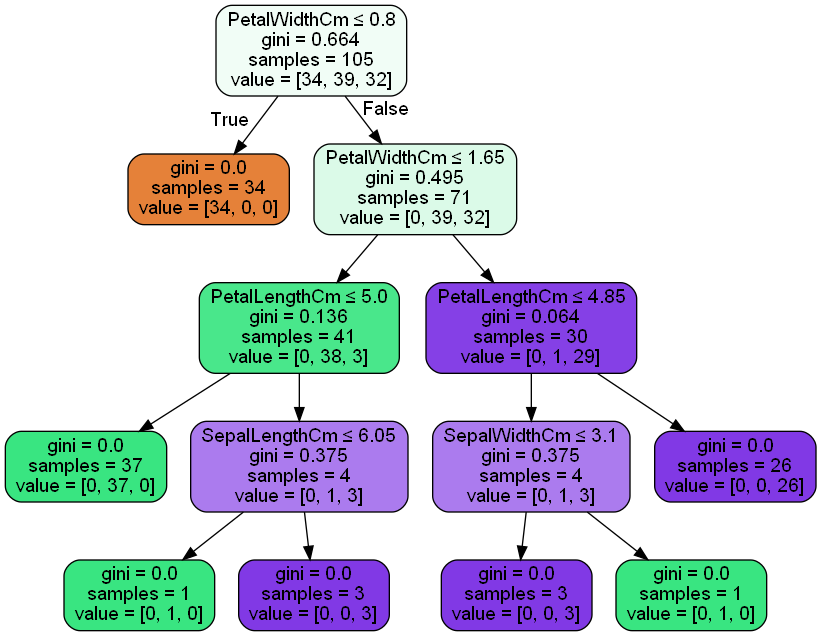

In [15]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris_dataset.columns.tolist()[1:5],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())






# Training with giniIndex to find best possible internal nodes. 

Calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly.

In [7]:
# Creating the classifier object 
dtree_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
# Performing training 
dtree_gini.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

# Visualizing Decision Tree with Gini Index

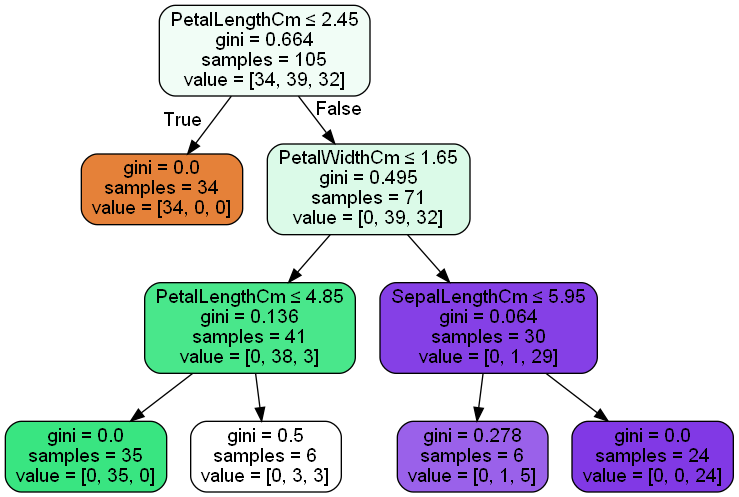

In [17]:
dot_data = StringIO()
export_graphviz(dtree_gini, out_file=dot_data, feature_names=iris_dataset.columns.tolist()[1:5],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


# Predictions

In [34]:
#Calculate accuracy for gini index based decision tree
y_pred_dtree_gini=prediction(X_test, dtree_gini)
      


Predicted values:
 ['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa']


# Accuracy Calculation

In [46]:
accuracy(y_test, y_pred_dtree_gini) 

Confusion Matrix: 
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy : 
 95.55555555555556
Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



# Training the Decision Tree with Entropy

In [19]:
dtree_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
dtree_entropy.fit(X_train, y_train) 
    

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

# Visualizing Decision Tree trained with Entropy

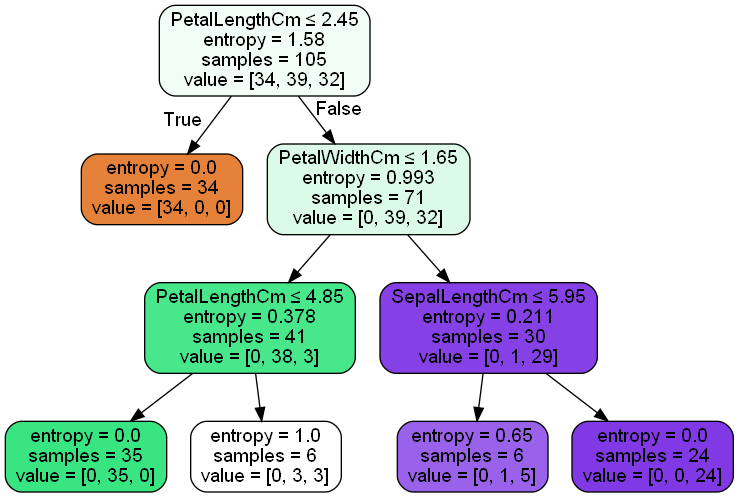

In [20]:
dot_data = StringIO()
export_graphviz(dtree_entropy, out_file=dot_data, feature_names=iris_dataset.columns.tolist()[1:5],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


# Predictions

In [40]:
#Calculate accuracy for entropy based decision tree
y_pred_dtree_entropy=prediction(X_test, dtree_entropy)
      


Predicted values:
 ['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa']


# Accuracy Calculation

In [47]:
accuracy(y_test, y_pred_dtree_entropy)

Confusion Matrix: 
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy : 
 95.55555555555556
Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



# Improving Model with Grid Search Cv

In [101]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 294 candidates, totalling 2940 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2940 out of 2940 | elapsed:    6.0s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [102]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)

In [103]:
grid_search_cv.best_params_

{'max_leaf_nodes': 4, 'min_samples_split': 2}

In [104]:
grid_search_cv.best_score_

0.9727272727272727

Thus we can see, tuning the hyperparameters has improved the model accuracy.It can be improved further by making a more researched grid of parameters.